## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
%load_ext autoreload
%autoreload 2
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
env = TicTacToe()

C:\Users\Supran\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [6]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = - 1/ (1 + np.exp((-time+7500000)/1700000)) + 1
    z = np.random.random()
#     print("epsilon_greedy 1 :::",state)     
    if z > epsilon:
        action = max(Q_dict[Q_state(state)],key=Q_dict[Q_state(state)].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
#         print("epsilon_greedy",valid_actions(state))
        action =  random.sample(valid_actions(state),1)[0]    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [7]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

In [8]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-3-x-x-x-6-x-x-x',(0,1)),
                       ('x-1-x-x-x-x-8-x-x',(2,9)),
                       ('x-x-x-x-6-x-x-x-5',(2,7)),
                       ('x-x-x-x-9-x-6-x-x',(1,7)),
                       ('x-5-x-2-x-x-4-7-x',(0,9)),
                       ('9-x-5-x-x-x-8-x-4',(1,3)),
                       ('2-7-x-x-6-x-x-3-x',(8,5)),
                       ('9-x-x-x-x-2-x-x-x',(2,5)),
                       ('x-x-7-x-x-x-x-x-2',(1,5)),
                       ('5-x-x-x-x-6-x-x-x',(4,9)),
                       ('4-x-x-6-x-x-3-1-x',(8,5)),
                       ('5-x-8-x-x-6-3-x-x',(3,1)),
                       ('x-6-5-x-2-x-x-3-x',(0,7)),
                       ('7-x-5-x-2-x-x-x-6',(1,3))]
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []
  
  
  

In [9]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [10]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [11]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [12]:
EPISODES = 6000000
LR = 0.01
GAMMA = 0.9
checkpoint = 600000
threshold = 2500

### Q-update loop ---write your code here

In [ ]:

start_time = time.time()

reward_track = {
    'x-3-x-x-x-6-x-x-x':[],
    'x-1-x-x-x-x-8-x-x':[],
    'x-x-x-x-6-x-x-x-5':[],
    'x-x-x-x-9-x-6-x-x':[],
    'x-5-x-2-x-x-4-7-x':[],
    '9-x-5-x-x-x-8-x-4':[],
    '2-7-x-x-6-x-x-3-x':[],
    '9-x-x-x-x-2-x-x-x':[],
    'x-x-7-x-x-x-x-x-2':[],
    '5-x-x-x-x-6-x-x-x':[],
    '4-x-x-6-x-x-3-1-x':[],
    '5-x-8-x-x-6-3-x-x':[],
    'x-6-5-x-2-x-x-3-x':[],
    '7-x-5-x-2-x-x-x-6':[]
}

agent_win_count = 0
env_win_count = 0
tie_count = 0

for episode in tqdm(range(EPISODES)):
    ##### Start writing your code from the next line
    initial_state = env.state
    curr_state = env.state
    add_to_dict(curr_state)
    total_reward = 0
    
    isTerminal = False
    
    while not(isTerminal):
        curr_action = epsilon_greedy(curr_state, episode)
        next_state, reward, isTerminal = env.step(curr_state, curr_action)
#         print("In loop ",next_state, reward, isTerminal)
        if isTerminal:
            Q_max = 0
            
            if reward == -10:
                env_win_count = env_win_count + 1
            elif reward == 10:
                agent_win_count = agent_win_count + 1
            else:
                tie_count = tie_count + 1
        else:
            add_to_dict(next_state)
#             print("Inside Q learning",Q_dict,Q_dict[Q_state(next_state)])
            max_next = max(Q_dict[Q_state(next_state)],key=Q_dict[Q_state(next_state)].get)
            Q_max = Q_dict[Q_state(next_state)][max_next]
        
        Q_dict[Q_state(curr_state)][curr_action] += LR * ((reward + (GAMMA*Q_max)) - Q_dict[Q_state(curr_state)][curr_action] ) 
        total_reward = total_reward + reward
        curr_state = next_state
        
    if (episode + 1) % checkpoint == 0:
        print("After playing %d games , agent won %.4f, enviorment won %.4f, and tie %.4f"% ( episode + 1,
        agent_win_count/(episode+1),env_win_count/(episode+1),tie_count/(episode + 1)))

    if (episode + 1) % threshold == 0:
        save_tracking_states()

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')
print('Total exection time ',elapsed_time)

 10%|███████                                                               | 600046/6000000 [53:15<5:08:12, 292.01it/s]

After playing 600000 games , agent won 0.2837, enviorment won 0.3288, and tie 0.3875


 20%|█████████████▍                                                     | 1200028/6000000 [1:26:26<4:24:19, 302.66it/s]

After playing 1200000 games , agent won 0.2855, enviorment won 0.3281, and tie 0.3864


 30%|████████████████████                                               | 1800053/6000000 [2:00:17<3:48:21, 306.53it/s]

After playing 1800000 games , agent won 0.2883, enviorment won 0.3268, and tie 0.3849


 40%|██████████████████████████▊                                        | 2400052/6000000 [2:32:21<2:53:03, 346.70it/s]

After playing 2400000 games , agent won 0.2916, enviorment won 0.3254, and tie 0.3830


 50%|█████████████████████████████████▌                                 | 3000029/6000000 [3:01:55<2:34:49, 322.95it/s]

After playing 3000000 games , agent won 0.2959, enviorment won 0.3233, and tie 0.3808


 60%|████████████████████████████████████████▌                           | 3579997/6000000 [3:30:15<7:39:28, 87.78it/s]

#### Check the Q-dictionary

In [139]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): 3.0156075822475037,
              (0, 3): 3.348371046728741,
              (0, 5): 3.3065928138164873,
              (0, 7): 1.0981766589435722,
              (0, 9): 2.6473443231078595,
              (1, 1): 3.7579777601580258,
              (1, 3): 3.179844162165498,
              (1, 5): 2.2147769353435383,
              (1, 7): 0.7008089455058082,
              (1, 9): 3.56898340787934,
              (2, 1): 3.87393867370212,
              (2, 3): 3.715490957009545,
              (2, 5): 3.8878056682596407,
              (2, 7): 4.005083790481964,
              (2, 9): 3.9375078359776374,
              (3, 1): 3.9580901458164806,
              (3, 3): 3.740838278098733,
              (3, 5): 3.405162110353589,
              (3, 7): 0.6310944489180903,
              (3, 9): 1.317545849077713,
              (4, 1): 3.3102644953079463,
              (4, 3): 3.482486403968963,
              (4, 5): 2.23613852684693,
         

In [140]:
len(Q_dict)

2702345

In [141]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
Q_dict['3-x-x-8-x-x-x-x-x']

{(1, 1): 2.619181819020957,
 (1, 5): 1.8850165085623924,
 (1, 7): 2.5720788428759795,
 (1, 9): 1.9658947108204865,
 (2, 1): 1.6754249937880923,
 (2, 5): 2.914644733127748,
 (2, 7): 3.821789090038383,
 (2, 9): 1.0888908870257914,
 (4, 1): -1.6839418590603077,
 (4, 5): -1.1926240616998656,
 (4, 7): 9.999999999999996,
 (4, 9): -1.1004527147917909,
 (5, 1): 1.9976928225892168,
 (5, 5): -1.352296381685404,
 (5, 7): -1.5512764674838064,
 (5, 9): -0.33840879156919523,
 (6, 1): 2.4700459263012426,
 (6, 5): 3.1244918897801632,
 (6, 7): -0.6722739965027661,
 (6, 9): 1.838714609023033,
 (7, 1): 0.8766768773997156,
 (7, 5): 3.0096104806648585,
 (7, 7): 0.525621935644458,
 (7, 9): 1.6073030726546291,
 (8, 1): 1.361062022357858,
 (8, 5): 3.1583947794034835,
 (8, 7): 3.270780913921665,
 (8, 9): 2.2155965534357547}

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [0]:
# Write the code for plotting the graphs for state-action pairs tracked

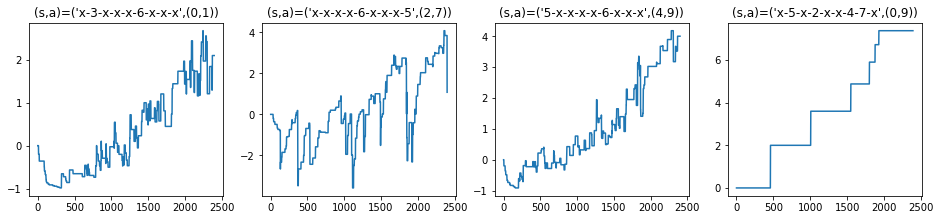

In [143]:
plt.figure(0, figsize=(16,7))
plt.subplot(241)
t1=States_track['x-3-x-x-x-6-x-x-x'][(0,1)]

plt.title("(s,a)=('x-3-x-x-x-6-x-x-x',(0,1))")
plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))

plt.subplot(242)
t2=States_track['x-x-x-x-6-x-x-x-5'][(2,7)]
plt.title("(s,a)=('x-x-x-x-6-x-x-x-5',(2,7))")
plt.plot(np.asarray(range(0, len(t2))),np.asarray(t2))

plt.subplot(243)
t3=States_track['5-x-x-x-x-6-x-x-x'][(4,9)]
plt.title("(s,a)=('5-x-x-x-x-6-x-x-x',(4,9))")
plt.plot(np.asarray(range(0, len(t3))),np.asarray(t3))

plt.subplot(244)
t4=States_track['x-5-x-2-x-x-4-7-x'][(0,9)]
plt.title("(s,a)=('x-5-x-2-x-x-4-7-x',(0,9))")
plt.plot(np.asarray(range(0, len(t4))),np.asarray(t4))

plt.show()

### Epsilon - decay check

In [144]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

C:\Users\Supran\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


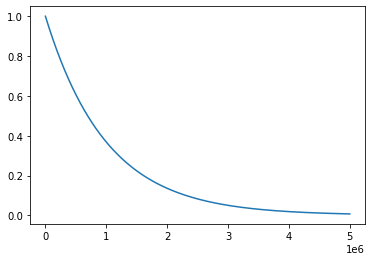

In [145]:
plt.plot(time, epsilon)
plt.show()